In [6]:
import serial
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import time


<IPython.core.display.Javascript object>


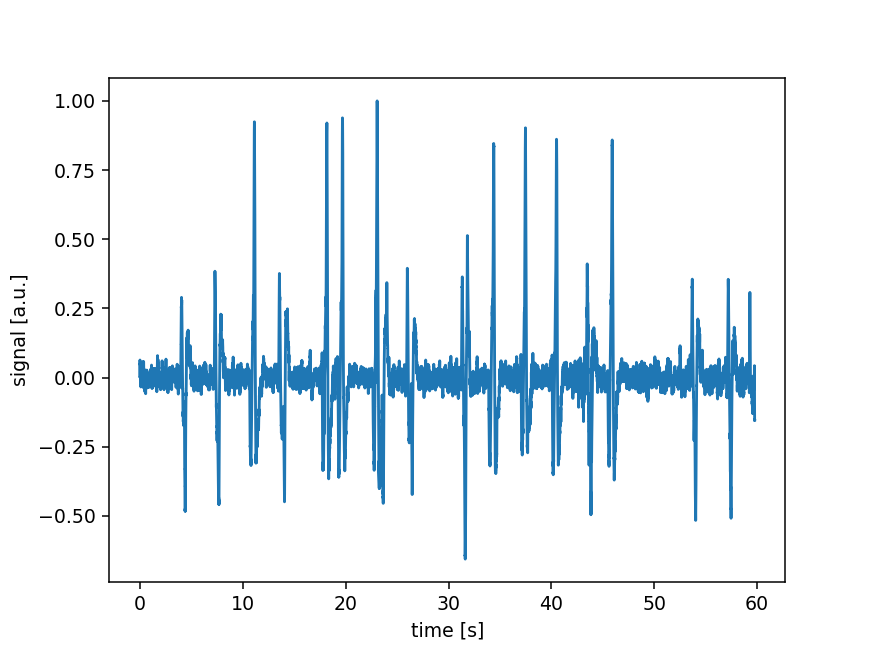

In [7]:
Fs,Ys = wavfile.read('./BYB_Recording_2019-01-18_18.15.16.wav')
Y = Ys/np.max(Ys)
T = np.arange(0,len(Y))/Fs   # time in seconds


plt.figure()
plt.plot(T,Y)
plt.xlabel('time [s]')
plt.ylabel('signal [a.u.]')
plt.show()

In [3]:
TWindow = 0.2;    # observation interval
TMax = np.max(T)  # maximum time recorded
dT = T[1]-T[0] # dT
NWindow = int(round(TWindow/dT))   # number of points in Window
delay_time = TWindow   # wait the "recording interval" time
# loop and plot..

<IPython.core.display.Javascript object>


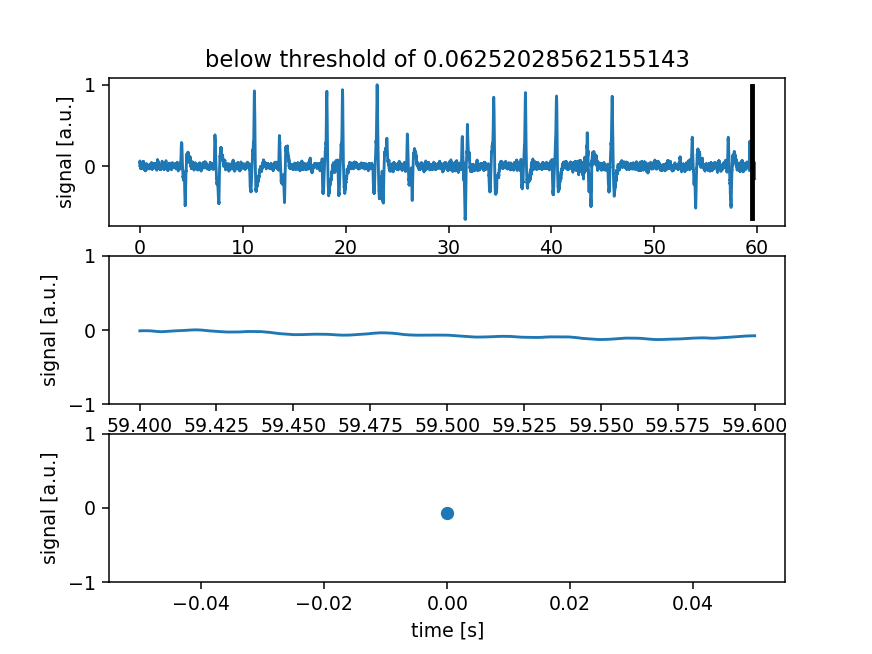

In [10]:
%matplotlib notebook

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
plt.ion()
fig.show()
fig.canvas.draw()
    
for k in range(0,int(round(TMax/TWindow))):
    # simplest approach: the first window only is the noise
    if k==0: 
        noise_level = np.mean(Y[0:NWindow])       
        # the threshold is 50 times the mean of the windows with no signal
        threshold_level = 50*noise_level
        
    window_index_beginning = 1+NWindow*(k-1)
    window_index_end = NWindow+NWindow*(k-1);
    window_index_range = range(window_index_beginning,window_index_end)
    

    ax1.clear()
    ax1.plot(T,Y)
    ax1.plot(np.array([T[window_index_beginning],T[window_index_beginning]]),np.array([np.min(Y),np.max(Y)]),'k')  
    ax1.plot(np.array([T[window_index_end],T[window_index_end]]),np.array([np.min(Y),np.max(Y)]),'k')   
    ax1.set_xlabel('time [s]')
    ax1.set_ylabel('signal [a.u.]')
    
    
    ax2.clear()
    ax2.plot(T[window_index_range],Y[window_index_range])
    ax2.set_ylim([-1,1])
    ax2.set_xlabel('time [s]')
    ax2.set_ylabel('signal [a.u.]')
    
    average_signal = np.mean(Y[window_index_range])
    
    ax3.clear()    
    ax3.plot(average_signal ,'o')
    ax3.set_ylim([-1,1])
    ax3.set_ylabel('signal [a.u.]')
    
    if average_signal>threshold_level:
        ax1.title.set_text('above threshold of ' + str(threshold_level))
    elif average_signal<-threshold_level:
        ax1.title.set_text('below threshold of ' + str(threshold_level))
    else:
        ax1.title.set_text('nothing happening, threshold ' + str(threshold_level))
    
    ax3.set_xlabel('time [s]')
    
    
    fig.canvas.draw()
    
    time.sleep(TWindow)
